# Look up protein expression of TF in tissue.
## 04-02-25

### Steve suggested to divide TF's between tissue specific and tissue ubiquitous for next level of tiss analysis
### 04-09-25 redo using tau computed on tissues.
### 05-01-25 Removed thymus and zero counts in charts.  Remade charts for figure. Reroganized so histograms followed heatmaps for Protein.
### 05-05-25 updated charts to make .pdf's for a supplemental figure
### 06-17-25 fixed error in number of TF's in both. now = 918.

### 06-25-25 use new file from Protein Atlas that includes subcellular location
### 06-25-25 the number of TF's in both is now 699 because 'uncertain' antibody stainings were eliminated.
### 06-27-25 new version from Konstantin with many more TF's

### 07-01-25 added Madhav style charts


## 08-05-25 Changed to use Cell Type generated Tau.


In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.patches as mpatches
import seaborn as sns


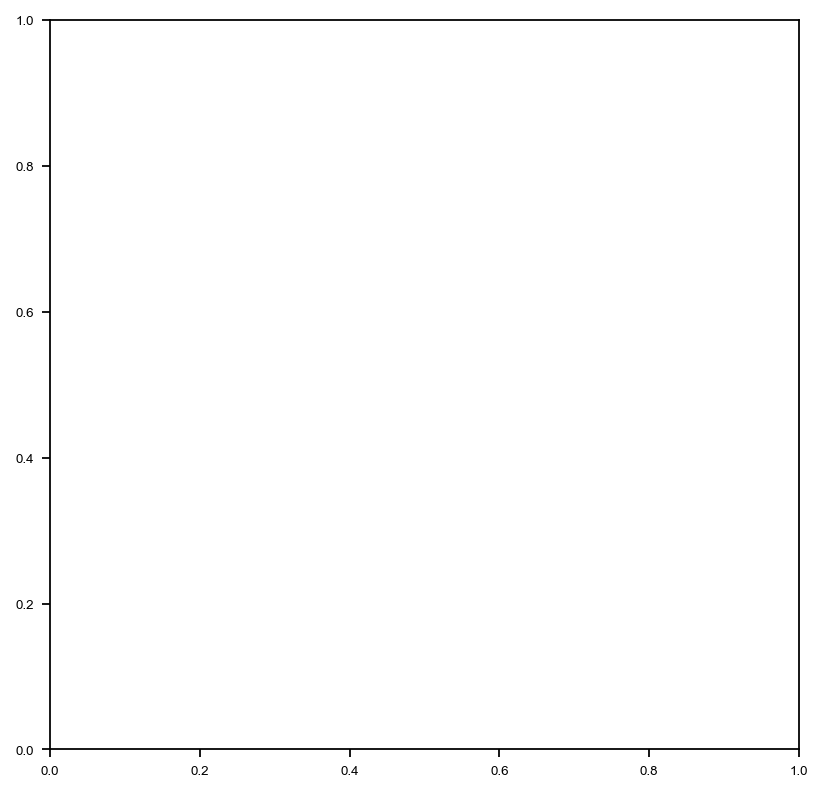

In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, 
                              facecolor='white', frameon=True, 
                              figsize=(3.0, 2.0), vector_friendly = False, 
                              transparent=True, format="pdf")

sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
fig, ax = plt.subplots(figsize = (6.0,6.0))

## This is IHS data from the ProteinAtlas database

In [3]:
DATA_IN_DIR = '/hpc/mydata/robert.jones/TFManuscript2GITHubPush/'

In [4]:
# mean meta data so we can look at cell types and tissues
cellfile = DATA_IN_DIR + 'Results/TFonly/TSP1_30_by_CellType_Full_Version2d_Nov2024_LogNorm_10XOnly_Mean_TFonly.csv'
broadfile = DATA_IN_DIR + 'Results/TFonly/TSP1_30_by_BroadCellClass_Full_Version2d_Nov2024_LogNorm_10XOnly_Mean_TFonly.csv'
tissfile = DATA_IN_DIR + 'Results/TFonly/TSP1_30_by_Tissue_Full_Version2d_Nov2024_LogNorm_10XOnly_Mean_TFonly.csv'


In [5]:
# get mean rna expr data
meanexpTissue = pd.read_csv(tissfile, index_col = 0)

In [6]:
# get tau's from cell type taus for ranking 
#     originally I used tissue derived taus. but in order to solve
#     confusion about which genes and number of genes tested in HPA, 
#     we switched to using CT generated tau values. 
#TFtaus =  pd.read_csv('/hpc/mydata/robert.jones/TFanalysisReviewCycle/TauValuesTissue.csv',index_col=0)

TFtaus =  pd.read_csv('/hpc/mydata/robert.jones/TFanalysisReviewCycle/TauValuesCelltype.csv',index_col=0)

TFtaus

,tau
FOXD4L4,0.999868
FIGLA,0.999667
GSX2,0.999634
NEUROG1,0.999582
HOXC12,0.999473
...,...
ZNF644,0.459571
ASH1L,0.450371
YY1,0.434433
BPTF,0.432127


In [7]:
notexpr = list(set(meanexpTissue.columns) - set(TFtaus.index))
print('TFs that are not expressed: :', notexpr)
meanexpTissue = meanexpTissue.drop(notexpr, axis = 1)

#this is the mean rna expression in each tissue that we will work
meanexpTissue.head()

TFs that are not expressed: : ['ZBED1', 'SHOX']


,NFYA,ARX,HOXA11,MEOX1,SOX8,ZNF195,ZFX,YBX2,ZNF263,DLX6,...,SEBOX,ZNF280B,ZNF2,HNF1B,DACH1,PCGF2,ZNF670,ZNF8,ZNF229,NR2E3
Fat,0.116136,0.000365,0.006666,0.033484,0.006042,0.092196,0.337779,0.000739,0.110565,0.000096,...,0.000025,0.007751,0.019992,0.000359,0.149782,0.065111,0.011537,0.019368,0.002486,0.002951
Thymus,0.116719,0.000263,0.000157,0.051168,0.007574,0.144109,0.368683,0.002198,0.125864,0.001111,...,0.000235,0.015204,0.025171,0.000851,0.139070,0.077001,0.014497,0.024514,0.002557,0.005327
Trachea,0.113458,0.002093,0.000338,0.014937,0.001420,0.117537,0.321388,0.001323,0.093623,0.000119,...,0.000088,0.009887,0.017234,0.002279,0.096954,0.060396,0.011401,0.023253,0.002203,0.006212
Blood,0.158123,0.000069,0.000017,0.002031,0.000594,0.058397,0.404916,0.000027,0.156157,0.000000,...,0.000018,0.005011,0.008931,0.000271,0.584723,0.002218,0.002512,0.013916,0.000653,0.000665
Large_Intestine,0.128122,0.001989,0.012668,0.001858,0.008751,0.103471,0.341736,0.016710,0.075964,0.000376,...,0.000000,0.007741,0.022853,0.038058,0.155614,0.032131,0.006394,0.013217,0.000325,0.003137


## Get custom built Human Protein Atlas file built by Konstantin
### it  has tissue, cell type, and subcell location all aligned.
### Thank you Konstantin Kahnert of the Emma Lundberg Lab

In [8]:
KonstantinData = pd.read_csv(DATA_IN_DIR + 'DataIn/FullListForKonstantin_KK.csv')
KonstantinData = KonstantinData.set_index('gene_name')
print(KonstantinData.shape)
print(len(KonstantinData.index.unique()))
print(len(KonstantinData.cell_type.unique()))
KonstantinData.head()

(136045, 9)
1637
109


,ensembl_id,antibody_id,tissue,cell_type,staining,intensity,quantity,location,reliability_score
gene_name,,,,,,,,,
NFYA,ENSG00000001167,CAB009250,Adipose tissue,Adipocytes,low,weak,>75%,cytoplasmic/membranous,enhanced
NFYA,ENSG00000001167,CAB009250,Adrenal gland,Glandular cells,low,weak,>75%,cytoplasmic/membranous,enhanced
NFYA,ENSG00000001167,CAB009250,Appendix,Glandular cells,low,weak,>75%,cytoplasmic/membranous,enhanced
NFYA,ENSG00000001167,CAB009250,Appendix,Lymphoid tissue,medium,moderate,>75%,nuclear,enhanced
NFYA,ENSG00000001167,CAB009250,Bone marrow,Hematopoietic cells,high,strong,>75%,nuclear,enhanced


In [9]:
# prune to just TF names found in both

# any control genes to add to probe this dataset?
genelist = list(TFtaus.index) 
prolist = list(KonstantinData.index.unique())

tflist = set(genelist).intersection(set(prolist))
len(tflist)

TFproDet = KonstantinData[KonstantinData.index.isin(tflist)]
len(tflist)# prune to just TF names found in both

# any control genes to add to probe this dataset?
genelist = list(TFtaus.index) 
prolist = list(KonstantinData.index.unique())

tflist = set(genelist).intersection(set(prolist))
len(tflist)

TFproDet = KonstantinData[KonstantinData.index.isin(tflist)]
len(tflist)

1633

In [10]:
# removing the uncertain staining cuts this from 1633 to 1127, but Konstantin highly recommends this.
print(len(TFproDet.index.unique()))
TFproDet = TFproDet[TFproDet.reliability_score != 'uncertain']
len(TFproDet.index.unique())
print(TFproDet.shape)
print(len(TFproDet.index.unique()))
print(len(TFproDet.cell_type.unique()))
TFproDet.head()

1633
(89476, 9)
1127
109


,ensembl_id,antibody_id,tissue,cell_type,staining,intensity,quantity,location,reliability_score
gene_name,,,,,,,,,
NFYA,ENSG00000001167,CAB009250,Adipose tissue,Adipocytes,low,weak,>75%,cytoplasmic/membranous,enhanced
NFYA,ENSG00000001167,CAB009250,Adrenal gland,Glandular cells,low,weak,>75%,cytoplasmic/membranous,enhanced
NFYA,ENSG00000001167,CAB009250,Appendix,Glandular cells,low,weak,>75%,cytoplasmic/membranous,enhanced
NFYA,ENSG00000001167,CAB009250,Appendix,Lymphoid tissue,medium,moderate,>75%,nuclear,enhanced
NFYA,ENSG00000001167,CAB009250,Bone marrow,Hematopoietic cells,high,strong,>75%,nuclear,enhanced


## Make common tissues names

In [11]:
print(TFproDet.tissue.unique())

['Adipose tissue' 'Adrenal gland' 'Appendix' 'Bone marrow' 'Breast'
 'Bronchus' 'Caudate' 'Cerebellum' 'Cerebral cortex' 'Cervix' 'Colon'
 'Duodenum' 'Endometrium 1' 'Endometrium 2' 'Epididymis' 'Esophagus'
 'Fallopian tube' 'Gallbladder' 'Heart muscle' 'Hippocampus' 'Kidney'
 'Liver' 'Lung' 'Lymph node' 'Nasopharynx' 'Oral mucosa' 'Ovary'
 'Pancreas' 'Parathyroid gland' 'Placenta' 'Prostate' 'Rectum'
 'Salivary gland' 'Seminal vesicle' 'Skeletal muscle' 'Skin 1' 'Skin 2'
 'Small intestine' 'Smooth muscle' 'Soft tissue 1' 'Soft tissue 2'
 'Spleen' 'Stomach 1' 'Stomach 2' 'Testis' 'Thyroid gland' 'Tonsil'
 'Urinary bladder' 'Vagina' nan]


In [12]:
# Mapping dictionary for renaming tissues
tissue_mapping = {
    'Adipose tissue': 'Fat',
    'Urinary bladder': 'Bladder',
    'Skeletal muscle': 'Muscle',
    'Lymph node': 'Lymph_Node',
    'Salivary gland': 'Salivary_Gland',
    'Small intestine': 'Small_Intestine',
    'Duodenmum': 'Small_Intestine',
    'Colon': 'Large_Intestine',
    'Heart muscle': 'Heart',
    'Bone marrow': 'Bone_Marrow',
    'Prostate': 'Prostate',
    'Endometrium': 'Uterus',
    'Stomach 1': 'Stomach',
    'Stomach 2': 'Stomach',
    'Testis': 'Testis',
    'Breast': 'Mammary',
    'Kidney': 'Kidney',
    'Liver': 'Liver',
    'Ovary': 'Ovary',
    'Pancreas': 'Pancreas',
    'Skin 1': 'Skin',
    'Skin 2': 'Skin',
    'Uterus': 'Uterus',
    'Lung': 'Lung',
    'Spleen': 'Spleen'
}

In [13]:
# make tissue names common and drop tissues not in TS
TFproDetTiss = TFproDet.copy()
print(len(TFproDet.index.unique()))
TFproDetTiss["Standardized_Tissue"] = TFproDetTiss["tissue"].map(tissue_mapping).fillna('not TS tissue')
TFproDet = TFproDetTiss[TFproDetTiss["Standardized_Tissue"] != 'not TS tissue']
print(len(TFproDet.index.unique()))
TFproDet.head()


1127
699


,ensembl_id,antibody_id,tissue,cell_type,staining,intensity,quantity,location,reliability_score,Standardized_Tissue
gene_name,,,,,,,,,,
NFYA,ENSG00000001167,CAB009250,Adipose tissue,Adipocytes,low,weak,>75%,cytoplasmic/membranous,enhanced,Fat
NFYA,ENSG00000001167,CAB009250,Bone marrow,Hematopoietic cells,high,strong,>75%,nuclear,enhanced,Bone_Marrow
NFYA,ENSG00000001167,CAB009250,Breast,Adipocytes,low,weak,>75%,cytoplasmic/membranous,enhanced,Mammary
NFYA,ENSG00000001167,CAB009250,Breast,Glandular cells,low,weak,>75%,cytoplasmic/membranous,enhanced,Mammary
NFYA,ENSG00000001167,CAB009250,Breast,Myoepithelial cells,low,weak,>75%,cytoplasmic/membranous,enhanced,Mammary


## Save Standardized protein expression file 

In [14]:
TFproDet.to_csv(DATA_IN_DIR + 'TFproDetTiss.csv')


## Now make tables that are heatmap-able from this data

In [15]:
TFprotexpDet = pd.read_csv('/hpc/mydata/robert.jones/ProteinAtlas/TFproDetTiss.csv', index_col = 0)
TFprotexpDet.head()

,ensembl_id,antibody_id,tissue,cell_type,staining,intensity,quantity,location,reliability_score,Standardized_Tissue
gene_name,,,,,,,,,,
NFYA,ENSG00000001167,CAB009250,Adipose tissue,Adipocytes,low,weak,>75%,cytoplasmic/membranous,enhanced,Fat
NFYA,ENSG00000001167,CAB009250,Bone marrow,Hematopoietic cells,high,strong,>75%,nuclear,enhanced,Bone_Marrow
NFYA,ENSG00000001167,CAB009250,Breast,Adipocytes,low,weak,>75%,cytoplasmic/membranous,enhanced,Mammary
NFYA,ENSG00000001167,CAB009250,Breast,Glandular cells,low,weak,>75%,cytoplasmic/membranous,enhanced,Mammary
NFYA,ENSG00000001167,CAB009250,Breast,Myoepithelial cells,low,weak,>75%,cytoplasmic/membranous,enhanced,Mammary


In [16]:
TFprotexpDet.staining.value_counts()

staining
not detected    17794
medium          11451
low              6542
high             6387
Name: count, dtype: int64

In [17]:
# For heatmaps, make this numerical 
numericLevel_mapping = {
    'not detected': 0,
    'low': 1,
    'medium': 2,
    'high': 3
}

TFprotexpDet["staining"] = TFprotexpDet["staining"].map(numericLevel_mapping).fillna(TFprotexpDet["staining"])
print(len(TFprotexpDet.index.unique()))
print(len(TFprotexpDet.Standardized_Tissue.unique()))
TFprotexpDet.head()

699
20


/tmp/ipykernel_807404/1894802432.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TFprotexpDet["staining"] = TFprotexpDet["staining"].map(numericLevel_mapping).fillna(TFprotexpDet["staining"])


,ensembl_id,antibody_id,tissue,cell_type,staining,intensity,quantity,location,reliability_score,Standardized_Tissue
gene_name,,,,,,,,,,
NFYA,ENSG00000001167,CAB009250,Adipose tissue,Adipocytes,1.0,weak,>75%,cytoplasmic/membranous,enhanced,Fat
NFYA,ENSG00000001167,CAB009250,Bone marrow,Hematopoietic cells,3.0,strong,>75%,nuclear,enhanced,Bone_Marrow
NFYA,ENSG00000001167,CAB009250,Breast,Adipocytes,1.0,weak,>75%,cytoplasmic/membranous,enhanced,Mammary
NFYA,ENSG00000001167,CAB009250,Breast,Glandular cells,1.0,weak,>75%,cytoplasmic/membranous,enhanced,Mammary
NFYA,ENSG00000001167,CAB009250,Breast,Myoepithelial cells,1.0,weak,>75%,cytoplasmic/membranous,enhanced,Mammary


In [18]:
genelist = TFtaus.index.sort_values()
tisslist = TFprotexpDet['Standardized_Tissue'].unique()

# this looks in a tissue at every gene and determines if expressed by summing the expression of that gene for all the cell types in that tissue.
# very brute force novice programming... 

TF_genetiss_table = pd.DataFrame(index = genelist, columns = list(tisslist))
TF_genetiss_table.loc[ : , :] = 'no data'

for tiss in tisslist:
    tt = TFprotexpDet[TFprotexpDet.Standardized_Tissue == tiss]  # one tissue at a time...
    for gene in genelist:  # one gene at a time
        ttgg = tt[tt.index == gene]
        if len(ttgg) > 0:  # if the row with that gene is still there, then it was tested in this tissue...
            if ttgg.staining.sum(0) == 0:  
                TF_genetiss_table.loc[gene , tiss ] = 'not detected'
            else:
                TF_genetiss_table.loc[gene , tiss ] = 'detected'
display(TF_genetiss_table)
TF_genetiss_table.shape


,Fat,Bone_Marrow,Mammary,Large_Intestine,Heart,Kidney,Liver,Lung,Lymph_Node,Ovary,Pancreas,Prostate,Salivary_Gland,Muscle,Skin,Small_Intestine,Spleen,Stomach,Testis,Bladder
ADNP,not detected,detected,detected,detected,detected,detected,not detected,detected,detected,detected,detected,detected,detected,not detected,detected,detected,detected,detected,detected,detected
ADNP2,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data
AEBP1,not detected,detected,not detected,detected,detected,detected,detected,detected,not detected,detected,detected,detected,not detected,detected,detected,detected,not detected,detected,detected,not detected
AEBP2,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data
AHCTF1,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUP1,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data
ZXDA,not detected,not detected,detected,detected,detected,detected,detected,not detected,not detected,not detected,detected,detected,detected,detected,not detected,detected,not detected,detected,detected,detected
ZXDB,not detected,not detected,detected,detected,detected,detected,detected,not detected,not detected,not detected,detected,detected,detected,detected,not detected,detected,not detected,detected,detected,detected
ZXDC,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data


(1635, 20)

In [19]:
TF_genetiss_table['Lung'].value_counts()

Lung
no data         936
detected        557
not detected    142
Name: count, dtype: int64

In [20]:
# Convert categorical values to numerical for heatmap
# NOTE that 0 and -1 are swapped here to make the seaborn color map work correctly.
mapping = {
    "detected": 1,
    "not detected": -1,
    "no data": 0  # Assign 0 for missing data
}
df_numeric = TF_genetiss_table.replace(mapping)
df_numeric

/tmp/ipykernel_807404/1469358907.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric = TF_genetiss_table.replace(mapping)


,Fat,Bone_Marrow,Mammary,Large_Intestine,Heart,Kidney,Liver,Lung,Lymph_Node,Ovary,Pancreas,Prostate,Salivary_Gland,Muscle,Skin,Small_Intestine,Spleen,Stomach,Testis,Bladder
ADNP,-1,1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1
ADNP2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AEBP1,-1,1,-1,1,1,1,1,1,-1,1,1,1,-1,1,1,1,-1,1,1,-1
AEBP2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AHCTF1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUP1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ZXDA,-1,-1,1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,1
ZXDB,-1,-1,1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,1
ZXDC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Create the heatmap
test = df_numeric.iloc[ : , : ]
testallpro = test
test.shape

(1635, 20)

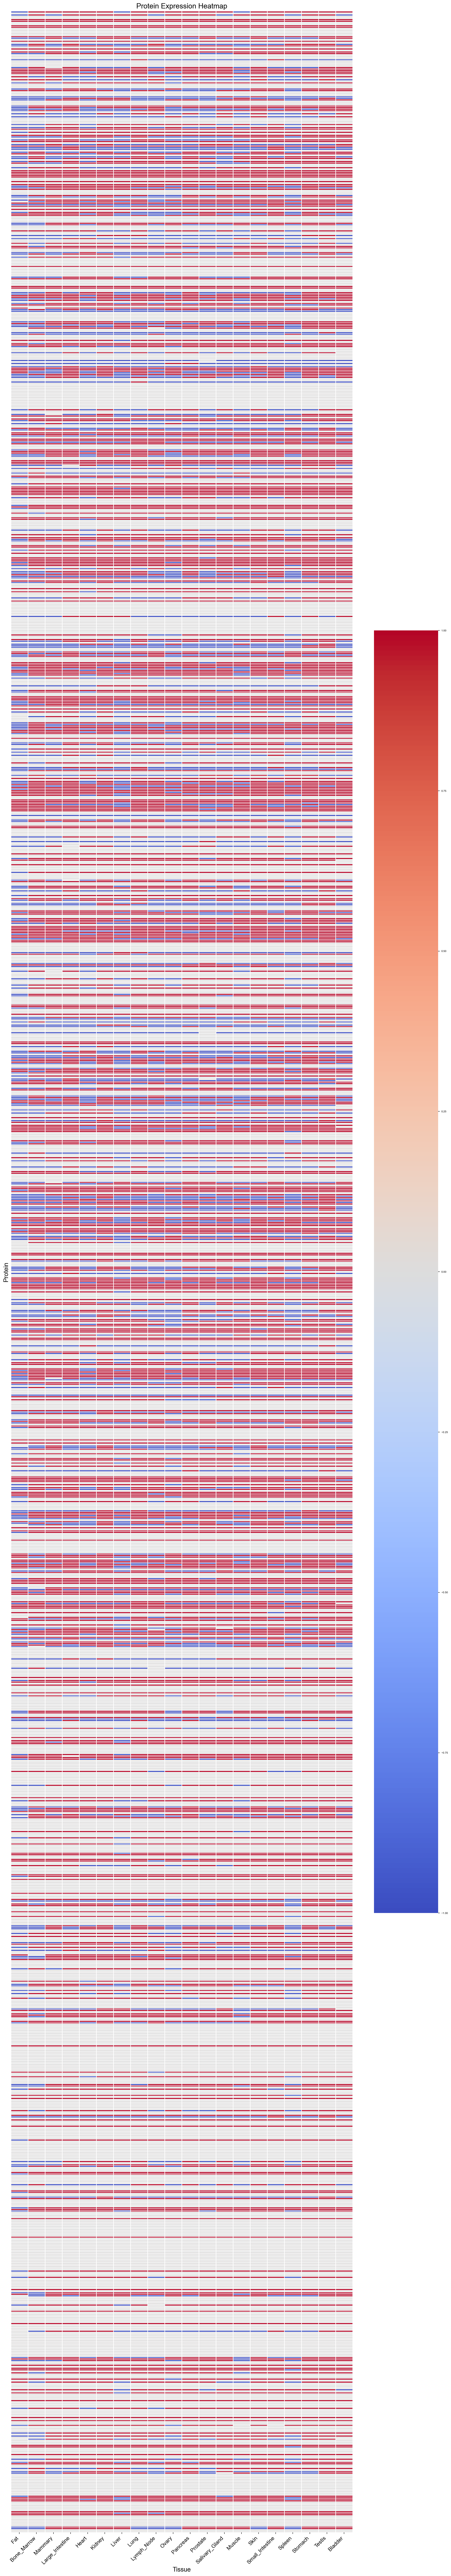

In [22]:
# Define figure size (width x height) to fit large number of genes
plt.figure(figsize=(14, 80))  # Increase height to fit all genes

# Create heatmap
ax = sns.heatmap(test, cmap="coolwarm", linewidths=0.5, annot=False, cbar=True)

# Adjust tick labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks([])  # Remove y-axis labels since 1635 genes are too many to display

# Set labels and title
plt.xlabel("Tissue", fontsize=14)
plt.ylabel("Protein", fontsize=14)
plt.title("Protein Expression Heatmap", fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()

# Show the heatmap
plt.show()

In [28]:

testtested = test.loc[ TFprotexpDet.index.unique() , test.columns[test.columns.isin(meanexpTissue.index)] ]
#savecommontfs = testtested.reset_index()
#savecommontfs = savecommontfs.loc[ : , 'gene_name']
#savecommontfs.sort_values().to_csv('/hpc/mydata/robert.jones/ProteinAtlas/TFcommonProteinAtlas.csv', index=False)
#testtested

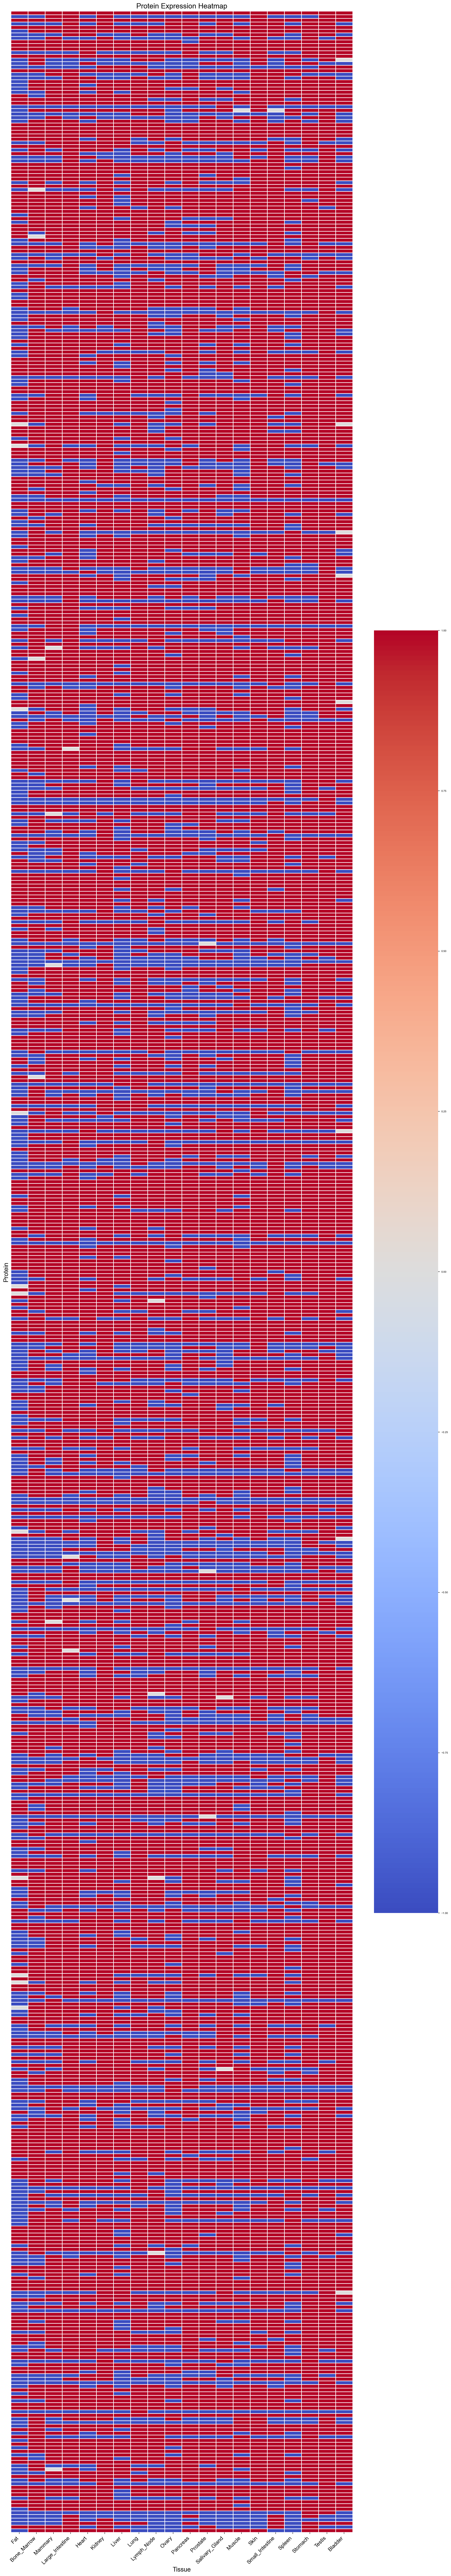

In [29]:
# Define figure size (width x height) to fit large number of genes
plt.figure(figsize=(14, 80))  # Increase height to fit all genes

# Create heatmap
ax = sns.heatmap(testtested, cmap="coolwarm", linewidths=0.5, annot=False, cbar=True)

# Adjust tick labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks([])  # Remove y-axis labels since 1635 genes are too many to display

# Set labels and title
plt.xlabel("Tissue", fontsize=14)
plt.ylabel("Protein", fontsize=14)
plt.title("Protein Expression Heatmap", fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()

# Show the heatmap
plt.show()

In [34]:
def plot_tiss_histo(dat, size, titl, fname):
    plt.figure(figsize = size)
    dat[dat != 1] = 0
    datsum = dat.sum(axis = 1)
    countover18 = datsum[datsum > 18]
    fractover18 = len(countover18)/len(datsum)
  
    bins = [x - 0.5 for x in range(1, 22)]  # 0..19 as the centers
    plt.hist(dat.T.sum(), bins=bins, linewidth = 0.5, width = 0.9)
    plt.xlabel('Number of tissues')
    plt.ylabel("Number of TFs detected")
    plt.title(titl)
    plt.xticks(range(21))
    plt.tight_layout()
    plt.savefig(DATA_IN_DIR + fname)
    plt.show()
    
    return(fractover18)

(699, 20)


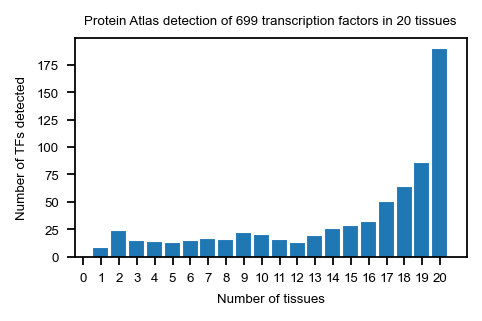

Fraction of TF found in 19 or 20 tissues 0.3948497854077253


In [35]:
print(testtested.shape)
titlestring = "Protein Atlas detection of " + str(len(testtested.index)) + " transcription factors in " + str(len(testtested.columns)) + " tissues"
x = plot_tiss_histo(testtested.copy(), (3.0, 2.0),titlestring, 'SuppFig5A_Tiss_proallTF.pdf')
print('Fraction of TF found in 19 or 20 tissues', x)

## 100 Lowest Tau Plots

In [36]:
# try with testtested..
lowTaus = TFtaus.tail(100)
testprolowtau = testtested[testtested.index.isin(lowTaus.index)].sort_values('gene_name')
testprolowtau.shape

(72, 20)

In [37]:
#testprolowtau.to_csv('/hpc/mydata/robert.jones/ProteinAtlas/lowTiss.csv')

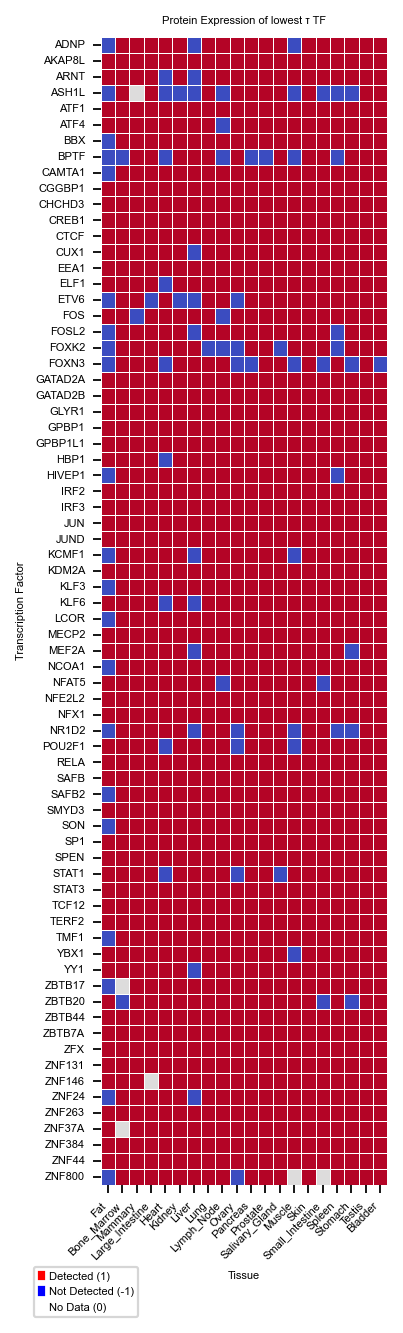

In [39]:
# Set figure size
plt.figure(figsize=(2.5, 8.2))

# Create the heatmap without color bar
ax = sns.heatmap(testprolowtau, 
                 cmap="coolwarm", 
                 linewidths=0.25, 
                 annot=False, 
                 cbar=False)  # Remove color bar

# Improve axis labels
plt.xticks(rotation=45, ha="right", fontsize=5)  # Rotate tissue labels
plt.yticks(fontsize=5)  # Adjust y-axis font size

# Set title and labels
plt.title("Protein Expression of lowest τ TF", fontsize=5)
plt.ylabel("Transcription Factor", fontsize=5)
plt.xlabel("Tissue", fontsize=5)

# Create a custom legend for the three states
legend_patches = [
    mpatches.Patch(color="red", label="Detected (1)"),
    mpatches.Patch(color="blue", label="Not Detected (-1)"),
    mpatches.Patch(color="white", label="No Data (0)")
]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(0.15, -0.12),  loc='lower right', fontsize=5)

# Adjust layout to prevent cutoff
plt.tight_layout()
plt.savefig(DATA_IN_DIR + 'SuppFig5B_Tiss_prolow_tau.pdf')
plt.show()

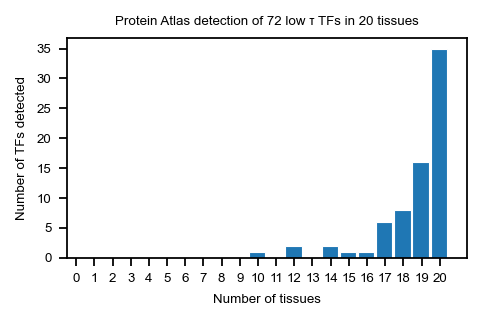

Fraction of TF found in 19 or 20 tissues 0.7083333333333334


In [40]:
titlestring = "Protein Atlas detection of " + str(len(testprolowtau.index)) + " low τ TFs in " + str(len(testprolowtau.columns)) + " tissues"
x = plot_tiss_histo(testprolowtau.copy(), (3.0 , 2.0), titlestring, 'Fig2C_Tiss_low.pdf')
print('Fraction of TF found in 19 or 20 tissues', x)

## 100 highest Tau Plots

In [ ]:
# try with testtested..
HiTaus = TFtaus.head(100)
testprohitau = testtested[testtested.index.isin(HiTaus.index)]
testprohitau.shape

In [ ]:


# Set figure size
plt.figure(figsize=(8 , 8))

# Create the heatmap without color bar
ax = sns.heatmap(testprohitau, 
                 cmap="coolwarm", 
                 linewidths=0.5, 
                 annot=False, 
                 cbar=False)  # Remove color bar

# Improve axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate tissue labels
plt.yticks(fontsize=10)  # Adjust y-axis font size

# Set title and labels
plt.title("Protein Expression - highest τ", fontsize=16)
plt.xlabel("TF protein", fontsize=14)
plt.ylabel("Tissue", fontsize=14)

# Create a custom legend for the three states
legend_patches = [
    mpatches.Patch(color="red", label="Detected (1)"),
    mpatches.Patch(color="blue", label="Not Detected (-1)"),
    mpatches.Patch(color="white", label="No Data (0)")
]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()

In [ ]:
titlestring = "Protein Atlas detection of " + str(len(testprohitau.index)) + " high τ TFs in " + str(len(testprohitau.columns)) + " tissues"
print(testprohitau.shape)
x = plot_tiss_histo(testprohitau.copy(), (3.0, 2.0), titlestring,'SuppFig_Tiss_hi_panelC.pdf')


## Make rna version of this same charts

In [ ]:
genes = TF_genetiss_table.index
tissues = TF_genetiss_table.columns
mtchart = meanexpTissue.loc[tissues, genes]
mtchart = mtchart != 0
mtchart[mtchart == True] = 'detected'
mtchart[mtchart == False] = 'not detected'

mtchart

In [ ]:
# Convert categorical values to numerical for heatmap
mapping = {
    "detected": 1,
    "not detected": -1,
    "no data": -1  # Assign 0 for missing data
}
df_numeric_rna = mtchart.replace(mapping).T
df_numeric_rna

In [ ]:
lowTaus = TFtaus.tail(100)
test = df_numeric_rna.loc[lowTaus.index , : ].T
print(test.shape)
testlowtau  = test
# rotated 90 for smaller number of tf's
#test.loc['Mammary', 'ATF4'] = 0


In [ ]:
import matplotlib.patches as mpatches

# Set figure size
plt.figure(figsize=(30, 12))

# Define fixed vmin and vmax for consistent coloring
ax = sns.heatmap(test, 
                 cmap="coolwarm", 
                 linewidths=0.5, 
                 annot=False, 
                 cbar=False, 
                 vmin=-1, vmax=1, center=0)  # Fix scale to always include -1, 0, and 1

# Improve axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate tissue labels
plt.yticks(fontsize=10)  # Adjust y-axis font size

# Set title and labels
plt.title("Gene Expression Heatmap - low tau", fontsize=16)
plt.xlabel("TF gene", fontsize=14)
plt.ylabel("Tissue", fontsize=14)

# Create a custom legend for the three states
legend_patches = [
    mpatches.Patch(color="red", label="Detected (1)"),
    mpatches.Patch(color="blue", label="Not Detected (-1)"),
    mpatches.Patch(color="white", label="No Data (0)")
]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()

In [ ]:
HiTaus = TFtaus.head(100)
test = df_numeric_rna.loc[HiTaus.index , : ].T
testhitau = test
print(test.shape)
test
# rotated 90 for smaller number of tf's

In [ ]:
import matplotlib.patches as mpatches

# Set figure size
plt.figure(figsize=(30 , 12))

# Create the heatmap without color bar
ax = sns.heatmap(test, 
                cmap="coolwarm", 
                linewidths=0.5, 
                annot=False, 
                cbar=False,
                vmax = 1,
                vmin = -1)  # Remove color bar

# Improve axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate tissue labels
plt.yticks(fontsize=10)  # Adjust y-axis font size

# Set title and labels
plt.title("Gene Expression Heatmap - high tau", fontsize=16)
plt.xlabel("TF gene", fontsize=14)
plt.ylabel("Tissue", fontsize=14)

# Create a custom legend for the three states
legend_patches = [
    mpatches.Patch(color="red", label="Detected (1)"),
    mpatches.Patch(color="blue", label="Not Detected (-1)"),
    mpatches.Patch(color="white", label="No Data (0)")
]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()

## Protein and RNA from low Tau genes metioned in the manuscript

In [ ]:
manuLoTau = [
    "TFDP1", "TFDP2", "E2F6", "ARNT", "ARNTL", "CEBPB", "CREB1", "CREBL2",
    "ETS1", "FOXO1", "FOXO3", "HIF1A", "PPARD", "SMAD3", "STAT1", "STAT3",
    "STAT5B", "XBP1", "ZBTB16", "ZFPM1", "ZNF16", "JUN", "JUNB", "JUND",
    "KLF4", "KLF10", "KLF11", "PBX1", "PBX2", "PBX3", "TEAD1", "TEAD2",
    "TEAD3", "ATF3", "ATF4", "ATF6", "DDIT3", "KLF2", "NFE2L2", "RBPJ",
    "TP53", "SREBF2", "NFATC1", "NCOA1", "NCOA2", "NCOA3"
]

In [ ]:
# first protein
test = df_numeric.loc[ manuLoTau , : ].T
print(test.shape)

In [ ]:
test

In [ ]:
import matplotlib.patches as mpatches

# Set figure size
plt.figure(figsize=(20, 12))

# Define fixed vmin and vmax for consistent coloring
ax = sns.heatmap(test, 
                 cmap="coolwarm", 
                 linewidths=0.5, 
                 annot=False, 
                 cbar=False, 
                 vmin=-1, vmax=1, center=0)  # Fix scale to always include -1, 0, and 1

# Improve axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate tissue labels
plt.yticks(fontsize=10)  # Adjust y-axis font size

# Set title and labels
plt.title("Protein Expression Heatmap - low tau in Manuscript", fontsize=16)
plt.xlabel("TF gene", fontsize=14)
plt.ylabel("Tissue", fontsize=14)

# Create a custom legend for the three states
legend_patches = [
    mpatches.Patch(color="red", label="Detected (1)"),
    mpatches.Patch(color="blue", label="Not Detected (-1)"),
    mpatches.Patch(color="white", label="No Data (0)")
]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()
plt.show()

In [ ]:
test = df_numeric_rna.loc[ manuLoTau , : ].T
print(test.shape)
test

In [ ]:
import matplotlib.patches as mpatches

# Set figure size
plt.figure(figsize=(20, 12))

# Define fixed vmin and vmax for consistent coloring
ax = sns.heatmap(test, 
                 cmap="coolwarm", 
                 linewidths=0.5, 
                 annot=False, 
                 cbar=False, 
                 vmin=-1, vmax=1, center=0)  # Fix scale to always include -1, 0, and 1

# Improve axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate tissue labels
plt.yticks(fontsize=10)  # Adjust y-axis font size

# Set title and labels
plt.title("Gene Expression Heatmap - low tau in Manuscript", fontsize=16)
plt.xlabel("TF gene", fontsize=14)
plt.ylabel("Tissue", fontsize=14)

# Create a custom legend for the three states
legend_patches = [
    mpatches.Patch(color="red", label="Detected (1)"),
    mpatches.Patch(color="blue", label="Not Detected (-1)"),
    mpatches.Patch(color="white", label="No Data (0)")
]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()

In [ ]:
manuHiTau = [
    "FOXP3", "EOMES", "IKZF1", "IKZF2", "IKZF3", "ETS1", "TCF21", "TBX20",
    "SREBF1", "ZIC1", "ZIC4", "MYF5", "CDX2", "CDX1", "ASCL2", "ONECUT2",
    "MYB", "HOXA9", "CBX2", "KLF1", "GATA1", "HEY1", "LHX6", "FOXC2", "ERG",
    "FLI1", "ELK3", "EPAS1", "SALL4", "DMRT1", "TCF3", "SOHLH1", "TCFL5",
    "MYBL1", "SOX30"
]

In [ ]:
# first protein
test = df_numeric.loc[ manuHiTau , : ].T
print(test.shape)
test.shape

In [ ]:
import matplotlib.patches as mpatches

# Set figure size
plt.figure(figsize=(20 , 12))

# Create the heatmap without color bar
ax = sns.heatmap(test, 
                 cmap="coolwarm", 
                 linewidths=0.5, 
                 annot=False, 
                 cbar=False)  # Remove color bar

# Improve axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate tissue labels
plt.yticks(fontsize=10)  # Adjust y-axis font size

# Set title and labels
plt.title("Protein Expression Heatmap - high tau in Manuscript", fontsize=16)
plt.xlabel("TF protein", fontsize=14)
plt.ylabel("Tissue", fontsize=14)

# Create a custom legend for the three states
legend_patches = [
    mpatches.Patch(color="red", label="Detected (1)"),
    mpatches.Patch(color="blue", label="Not Detected (-1)"),
    mpatches.Patch(color="white", label="No Data (0)")
]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()

In [ ]:
# then rna
test = df_numeric_rna.loc[ manuHiTau , : ].T
print(test.shape)
test.shape

In [ ]:
test

In [ ]:
import matplotlib.patches as mpatches

# Set figure size
plt.figure(figsize=(20, 12))

# Define fixed vmin and vmax for consistent coloring
ax = sns.heatmap(test, 
                 cmap="coolwarm", 
                 linewidths=0.5, 
                 annot=False, 
                 cbar=False, 
                 vmin=-1, vmax=1, center=0)  # Fix scale to always include -1, 0, and 1

# Improve axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate tissue labels
plt.yticks(fontsize=10)  # Adjust y-axis font size

# Set title and labels
plt.title("Gene Expression Heatmap - high tau in Manuscript", fontsize=16)
plt.xlabel("TF gene", fontsize=14)
plt.ylabel("Tissue", fontsize=14)

# Create a custom legend for the three states
legend_patches = [
    mpatches.Patch(color="red", label="Detected (1)"),
    mpatches.Patch(color="blue", label="Not Detected (-1)"),
    mpatches.Patch(color="white", label="No Data (0)")
]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Adjust layout to prevent cutoff
plt.tight_layout()

In [ ]:
testtested 
df = testtested.sort_index(axis=1, ascending = False )

In [ ]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, 
                              facecolor='white', frameon=True, 
                              figsize=(3.0, 2.0), vector_friendly = False, 
                              transparent=True, format="pdf")

sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})


print(df.shape)
# Count values per gene
value_counts = df.apply(lambda col: col.value_counts()).fillna(0).astype(int).T

# Reorder and rename columns
value_counts = value_counts.reindex(columns=[1, 0, -1], fill_value=0)
value_counts.columns = ['validated', 'not tested', 'not validated']

# Plot
ax = value_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(3.5, 2.0),
    colormap='coolwarm'
)

#plt.title("Validation Status Distribution per Gene")
plt.xlabel("Tissue")
plt.ylabel("Count")
plt.xticks(rotation=90)

# Horizontal legend at top
plt.legend(
    title="Status",
    loc="lower center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=3
)

plt.tight_layout()
plt.savefig('/hpc/mydata/robert.jones/ProteinAtlas/SuppFigTissTestedChart.pdf')
plt.show()

In [ ]:
# Changes made below to swap x and y axis and place legend at the top
ax = value_counts.plot(
    kind='barh',
    stacked=True,
    figsize=(2.0, 3.5),
    colormap='coolwarm'
)

plt.xlabel("Transcription Factor Count")
plt.ylabel("Cell type")

# Legend at the top
plt.legend(
    title="Summary of cell types validated by protein ",
    loc="lower center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=3
)
plt.savefig('/hpc/mydata/robert.jones/ProteinAtlas/SuppFigTissTestedChartV2.pdf')
plt.tight_layout()
plt.show()